In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, e, epsilon_0, c, m_u, k, m_e, alpha

In [19]:
def Pressure(T):
    """Vapor pressure in a thermal cell
    expects T in Kelvin"""
    # return 7e-8 # <--- USE THIS for finding background P
    if (T<312.46):
        return 10**( -94.04826 - 1961.258/T - 0.03771687*T + 42.57526*np.log10(T) )
    else:
        return 10**( 15.88253 - 4529.635/T + 0.00058663*T - 2.99138*np.log10(T) )

In [23]:
T = 200
N = Pressure(T)*133.323/(k*T)
print(N)


1789856166.5598528


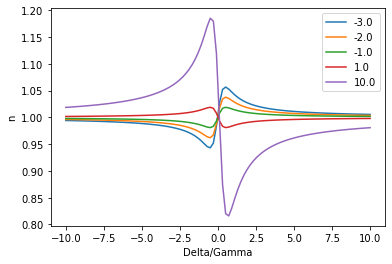

In [37]:
lambda_at = 780*1e-9
gamma = 6 #MHz

detuning = np.linspace(-10,10,100)

chi1 = -N*3*((lambda_at**3)/(4*np.pi**2))*((2*detuning/gamma)-1j)/(1+4*(detuning/gamma)**2)
disp_indice = np.real(np.sqrt(1+chi1))

#plt.plot(detuning,disp_indice)
#plt.xlabel('detuning')
#plt.ylabel('n')

def chi(rho_lam3,delta_gamma):
    return -3*((rho_lam3)/(4*np.pi**2))*((2*delta_gamma)-1j)/(1+4*(delta_gamma)**2)
    
def n(rho_lam3,delta_gamma):
    return np.real(np.sqrt(1+chi(rho_lam3,delta_gamma)))

def nxi(xi):
    return np.real(np.sqrt(1+xi))

delta_gamma = np.linspace(-10,10,100)
rho_lambda = np.array([e-3,e-2,e-1,1,10])
wavelength = 780.241209686*1e-9
plt.figure()
for rho_lam in rho_lambda:
    plt.plot(delta_gamma,n(rho_lam,delta_gamma),label = rho_lam)
plt.xlabel('Delta/Gamma')
plt.legend()
plt.ylabel('n')
plt.savefig('figures/n_vs_delta.pdf')
plt.show()
plt.close()

In [44]:
def Xii(rho_lambda,delta_gamma):
    return -3*(rho_lambda/(4*np.pi**2))*((2*delta_gamma))/(1+4*(delta_gamma)**2)

rho_lambda = np.linspace(1e-3,10,10000)
detuning = np.linspace(-10,10,10000)
X,Y = np.meshgrid(rho_lambda,detuning)
Z = n(Xii(X,Y))
plt.figure()
plt.xlabel('rho lambda3')
plt.ylabel('Delta/gamma')
plt.imshow(Z)
plt.title('Xi')
plt.colorbar()
plt.savefig('figures/xi.pdf')
plt.close()

TypeError: n() missing 1 required positional argument: 'delta_gamma'

In [12]:
print(Xii(1,2))

None
